In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import time
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
def train_lr():
    global lr_inst
    global training_files
    global training_files_old
    global features
    global labels
    global features_train
    global features_test
    global labels_train
    global labels_test
    global X_train
    global X_test
    global sc

    for fname in training_files:
        meal = open(fname, "rt")
        for line in meal:
            data_list = line.rsplit(",")
            if(len(data_list) != 11):
                print("error data")
            else:
                data_list[(len(data_list)-1)]=data_list[(len(data_list)-1)].replace('\n', '')
                features.append(data_list[:(len(data_list)-1)])
                labels.append(data_list[(len(data_list)-1)])
        meal.close()
    for fname in training_files_old:
        meal = open(fname, "rt")
        for line in meal:
            data_list = line.rsplit(",")
            if(len(data_list) != 12):
                print("error data")
            else:
                data_list.pop(6)
                data_list[(len(data_list)-1)]=data_list[(len(data_list)-1)].replace('\n', '')
                features.append(data_list[:(len(data_list)-1)])
                labels.append(data_list[(len(data_list)-1)])
        meal.close()
    print(f"Size of feature dataset : {len(features)}")
    print("Features first and last entries:\n\t", end = "")
    print(features[:1] + features[(len(features)-1):])
    print("Labels first and last entries:\n\t", end = "")
    print(labels[:1] + labels[(len(features)-1):])
    
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, stratify=labels, random_state = 0)
    
    # Feature scaling (or standardization)
    sc = StandardScaler()
    X_train = sc.fit_transform(features_train)
    X_test = sc.transform(features_test)
    
    lr_inst.fit(X_train, labels_train)
    
    labels_pred = lr_inst.predict(X_test)
    
    cm = confusion_matrix(labels_test,labels_pred)
    sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear Regresion') # fmt='d' formats the numbers as digits, which means integers
    
    print(classification_report(labels_test,labels_pred))
    
    lr_auc = roc_auc_score(labels_test, labels_pred)
    print('Linear Regresion: ROC AUC=%.3f' % (lr_auc))

Size of feature dataset : 915
Features first and last entries:
	[['0.7261086193007366', '430665064.39644605', '210.99431580955545', '0.0', '6000', '98.65693082596883', '0.0', '0.0', '0.0', '40'], ['0.0', '0.0', '0.0', '0.0', '171', '0.0', '0.0', '0.0', '0.0', '1']]
Labels first and last entries:
	['1', '0']
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       113
           1       0.98      0.93      0.96        70

    accuracy                           0.97       183
   macro avg       0.97      0.96      0.96       183
weighted avg       0.97      0.97      0.97       183

Linear Regresion: ROC AUC=0.960


C:\Users\H P VICTUS\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


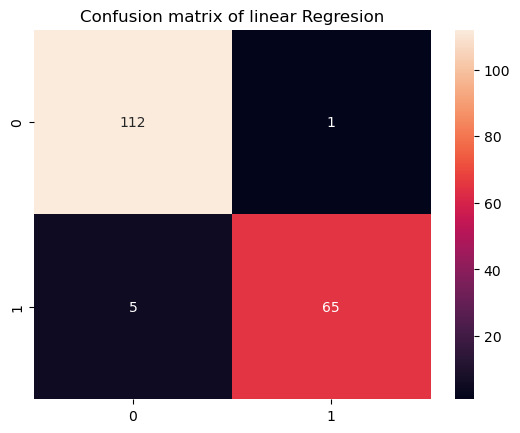

In [3]:
features, labels = [], []
lr_inst = LogisticRegression(random_state = 0)
training_files = ["dataset/individual/dataset_http_individual_attack_1.csv",
                  "dataset/individual/dataset_http_individual_normal_1.csv"]
training_files_old = ["dataset/individual/old/dataset_http_attack.csv",
                  "dataset/individual/old/dataset_http_normal_1.csv",
                  "dataset/individual/old/dataset_http_normal_2.csv"]
train_lr()

In [4]:
time_start = time.perf_counter()
result = lr_inst.predict([X_test[0]])[0]
print(f"Time elapse for prediction : {time.perf_counter() - time_start}")
print(f"Correct result : {labels_test[0]}")
print(f"Predicted result : {result}")

Time elapse for prediction : 0.0002918000000002863
Correct result : 1
Predicted result : 1


In [5]:
time_start = time.perf_counter()
data = sc.transform([features_test[2]])
result = lr_inst.predict([data[0]])[0]
print(f"Time elapse for prediction : {time.perf_counter() - time_start}")
print(f"Correct result : {labels_test[2]}")
print(f"Predicted result : {result}")

Time elapse for prediction : 0.0006713000000000413
Correct result : 0
Predicted result : 0


In [6]:
# joblib.dump(svm_inst, 'model_svm_tcp_5detik.sav')
# joblib.dump(sc, 'scaler_svm_tcp_5detik.save') 